In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving faitsSupp.csv to faitsSupp.csv


In [ ]:
df = pd.read_csv('/content/faitsSupp.csv', encoding='cp1252', sep=';')

In [ ]:
df.head()

SupplierFk  ProduitFk  TransactionDate  DateResolution  DisputesDate  \
0           6         21             8107           37407         29690   
1           7         20            17156           33882          5004   
2           8         24            13345           36558         15869   
3           9         10            20256           35730         29431   
4          10         25            13397           31799         14034   

  AmountDue AmountPaid BalanceDue TotalDiscountUsed TotalSales DiscountOffered  
0    439,00     409,00      30,00               ,00    4109,00             ,00  
1   4819,00    1327,00    3492,00               ,00    4508,00             ,00  
2   1173,00    1101,00      72,00               ,00    4473,00             ,00  
3   1754,00     410,00    1344,00               ,00    3307,00             ,00  
4   3285,00    3217,00      68,00               ,00    3255,00             ,00

In [ ]:
print(df.dtypes)

SupplierFk            int64
ProduitFk             int64
TransactionDate       int64
DateResolution        int64
DisputesDate          int64
AmountDue            object
AmountPaid           object
BalanceDue           object
TotalDiscountUsed    object
TotalSales           object
DiscountOffered      object
dtype: object


In [ ]:
cols_to_convert = ['AmountDue','AmountPaid','TotalDiscountUsed','TotalSales','TotalSales']

for col in cols_to_convert:
    df[col] = df[col].astype(str)  # Convertir en string pour éviter les erreurs
    df[col] = df[col].str.replace(',', '', regex=True)  # Supprimer les virgules
    df[col] = df[col].str.replace('[^0-9.-]', '', regex=True)  # Supprimer tout sauf chiffres et points
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir en float


In [ ]:
print(df.dtypes)

SupplierFk            int64
ProduitFk             int64
TransactionDate       int64
DateResolution        int64
DisputesDate          int64
AmountDue             int64
AmountPaid            int64
BalanceDue           object
TotalDiscountUsed     int64
TotalSales            int64
DiscountOffered      object
dtype: object


In [ ]:
# Display correlation matrix for numerical columns
corr = df.corr(numeric_only=True)
corr

SupplierFk  ProduitFk  TransactionDate  DateResolution  \
SupplierFk           1.000000   0.995082         0.144105       -0.455667   
ProduitFk            0.995082   1.000000         0.155427       -0.410300   
TransactionDate      0.144105   0.155427         1.000000        0.051026   
DateResolution      -0.455667  -0.410300         0.051026        1.000000   
DisputesDate        -0.144457  -0.144462         0.022089       -0.023496   
AmountDue            0.594400   0.598328        -0.042717       -0.269822   
AmountPaid           0.646254   0.650342        -0.064086       -0.288554   
TotalDiscountUsed    0.165053   0.145553        -0.101472       -0.133545   
TotalSales           0.687352   0.696307         0.140617       -0.322905   

                   DisputesDate  AmountDue  AmountPaid  TotalDiscountUsed  \
SupplierFk            -0.144457   0.594400    0.646254           0.165053   
ProduitFk             -0.144462   0.598328    0.650342           0.145553   
TransactionDate        0.022089  -0.042717   -0.064086          -0.101472   
DateResolution        -0.023496  -0.269822   -0.288554          -0.133545   
DisputesDate           1.000000  -0.139578   -0.126176           0.001193   
AmountDue             -0.139578   1.000000    0.988907          -0.050209   
AmountPaid            -0.126176   0.988907    1.000000          -0.048746   
TotalDiscountUsed      0.001193  -0.050209   -0.048746           1.000000   
TotalSales             0.030871   0.369119    0.407869          -0.013625   

                   TotalSales  
SupplierFk           0.687352  
ProduitFk            0.696307  
TransactionDate      0.140617  
DateResolution      -0.322905  
DisputesDate         0.030871  
AmountDue            0.369119  
AmountPaid           0.407869  
TotalDiscountUsed   -0.013625  
TotalSales           1.000000

In [ ]:
# target
y = df['AmountDue']

In [ ]:
print(df['AmountDue'])

0       43900
1      481900
2      117300
3      175400
4      328500
5      160000
6      250000
7      180000
8      170000
9      140000
10     220000
11     170000
12     130000
13     160000
14     260000
15     150000
16     300000
17     190000
18     170000
19     320000
20     280000
21     260000
22     330000
23     240000
24     350000
25     270000
26     280000
27     350000
28     260000
29     350000
30     310000
31     290000
32     340000
33     340000
34     310000
35     400000
36     270000
37    1960000
38    1980000
39    2100000
Name: AmountDue, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
y_scaled = scaler.fit_transform(y.values.reshape(-1,1))

In [ ]:
X = df[['AmountPaid','TotalSales']]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.6017612 , -0.78357636],
       [-0.41371083, -0.56251782],
       [-0.46000645, -0.58190892],
       [-0.60155635, -1.22790958],
       [-0.02654829, -1.25671922],
       [-0.58312004, -1.61933279],
       [-0.37827214, -1.39772022],
       [-0.68554399, -1.28691393],
       [-0.54215046, -1.17610764],
       [-0.48069609, -1.06530135],
       [-0.43972651, -0.95449506],
       [-0.33730256, -0.73288249],
       [-0.41924172, -0.6220762 ],
       [-0.52166567, -0.51126991],
       [-0.31681777, -0.40046362],
       [-0.37827214, -0.28965733],
       [-0.37827214, -0.17885104],
       [-0.29633298, -0.06804476],
       [-0.33730256,  0.04276153],
       [-0.19390903,  0.15356782],
       [-0.2553634 ,  0.26437411],
       [-0.23487861,  0.3751804 ],
       [-0.37827214,  0.48598669],
       [-0.19390903,  0.59679297],
       [-0.17342424,  0.70759926],
       [-0.13245465,  0.81840555],
       [-0.29633298,  0.92921184],
       [ 0.03142367,  1.04001813],
       [-0.15293944,

In [ ]:
df = pd.DataFrame(df)

def classify_amount_due(amount):
    if amount < 100000:
        return 'Faible'
    elif amount <= 300000:
        return 'Moyenne'
    else:
        return 'Élevée'

df['AmountDueClass'] = df['AmountDue'].apply(classify_amount_due)



In [ ]:
y = df['AmountDueClass']  # Variable cible (classification de AmountDue)

In [ ]:
# 3. Séparer les données en jeu d'entraînement et jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
# 4. Appliquer un modèle de classification (Random Forest ici)
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# 5. Prédire les classes pour le jeu de test
y_pred = model.predict(X_test)

In [ ]:
# 6. Évaluation du modèle
print("Classification Report :")
print(classification_report(y_test, y_pred))

# 7. Afficher les résultats
df_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print("\nRésultats de la classification :")
print(df_results)

Classification Report :
              precision    recall  f1-score   support

     Moyenne       0.80      1.00      0.89         4
      Élevée       1.00      0.75      0.86         4

    accuracy                           0.88         8
   macro avg       0.90      0.88      0.87         8
weighted avg       0.90      0.88      0.87         8


Résultats de la classification :
     Actual Predicted
19   Élevée   Moyenne
16  Moyenne   Moyenne
15  Moyenne   Moyenne
26  Moyenne   Moyenne
4    Élevée    Élevée
12  Moyenne   Moyenne
37   Élevée    Élevée
27   Élevée    Élevée


In [ ]:
# Charger le modèle
import joblib
# 4. Sauvegarder le modèle dans un fichier .pkl
joblib.dump(model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
joblib.dump(scaler, 'scalerRandom.pkl')

['scalerRandom.pkl']

svm

In [ ]:
# 1. Importer les bibliothèques
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Définir X et y
X = df[['AmountPaid', 'TotalSales']]
y = df['AmountDueClass']

# 3. Standardiser les données (important pour SVM !)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Diviser en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Appliquer le modèle SVM
svm = SVC(kernel='rbf')  # 'rbf' est le noyau le plus utilisé
svm.fit(X_train, y_train)

# 6. Prédictions
y_pred = svm.predict(X_test)

# 7. Évaluation du modèle
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - SVM")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()


Accuracy : 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

     Moyenne       0.71      0.71      0.71         7
      Élevée       0.60      0.60      0.60         5

    accuracy                           0.67        12
   macro avg       0.66      0.66      0.66        12
weighted avg       0.67      0.67      0.67        12



 Gradient Boosting Classifier :

Accuracy : 0.5833333333333334

Classification Report:
               precision    recall  f1-score   support

     Moyenne       0.75      0.43      0.55         7
      Élevée       0.50      0.80      0.62         5

    accuracy                           0.58        12
   macro avg       0.62      0.61      0.58        12
weighted avg       0.65      0.58      0.57        12



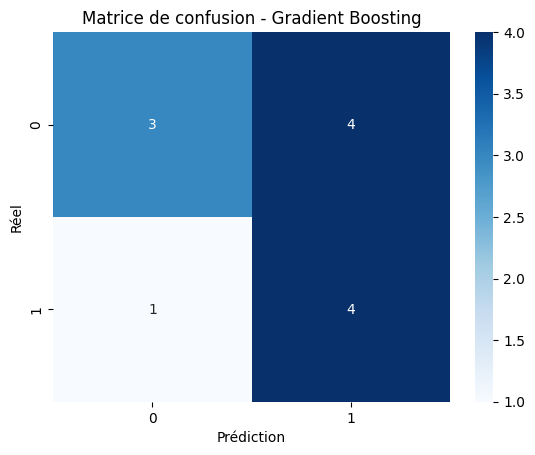

In [ ]:
# 1. Importer les bibliothèques
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Définir X et y
X = df[['AmountPaid', 'TotalSales']]
y = df['AmountDueClass']

# 3. Standardiser les données (utile mais pas obligatoire pour Gradient Boosting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Diviser en train et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# 5. Appliquer le modèle Gradient Boosting
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)

# 6. Prédictions
y_pred = gbc.predict(X_test)

# 7. Évaluation du modèle
print("Accuracy :", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 8. Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion - Gradient Boosting")
plt.xlabel("Prédiction")
plt.ylabel("Réel")
plt.show()
